In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
df_2 = pd.read_csv("KU-HAR.csv",header=None)
dff = df_2.values
signals = dff[:, 0: 1800]
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800]

print(df_2.shape)
print(labels.shape)

(20750, 1803)
(20750,)


In [17]:
df = df_2.copy()

In [7]:
df.columns[df.isna().any()].tolist()

[]

In [11]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1793,c1794,c1795,c1796,c1797,c1798,c1799,c1800,c1801,c1802
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,-0.016692,-0.018566,-0.017361,-0.017919,-0.016680,-0.016650,-0.013097,0,300,1
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,-0.008210,-0.010408,-0.011459,-0.011747,-0.010394,-0.008070,-0.004354,0,300,2
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.000915,0.000771,-0.002560,-0.003020,-0.004190,0.000215,0.000850,0,300,3
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.001209,0.002878,0.000663,0.000982,-0.002148,-0.009200,-0.010653,0,300,4
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,-0.006369,-0.006614,-0.004698,-0.007279,-0.006861,-0.006161,-0.006113,0,300,5


In [34]:
df['c1800'].unique()

array([0, 'A', 'B', 1, 2, 10, 11, 12, 13, 14, 15, 16, 17, 3, 4, 5, 6, 7,
       8, 9], dtype=object)

In [42]:
df = df[df.c1800 != 'A']

In [44]:
df = df[df.c1800 != 'B']

In [45]:
df['c1800'].value_counts()

4     2178
0     1879
1     1873
3     1866
5     1813
2     1797
6     1762
7     1333
10    1005
11     882
15     798
16     781
8      666
14     594
9      480
17     458
12     317
13     259
Name: c1800, dtype: int64

In [49]:
df['c1801'].value_counts()

300    20741
Name: c1801, dtype: int64

In [50]:
df.drop(['c1801'], axis=1, inplace=True)

In [51]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1792,c1793,c1794,c1795,c1796,c1797,c1798,c1799,c1800,c1802
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,-0.015142,-0.016692,-0.018566,-0.017361,-0.017919,-0.016680,-0.016650,-0.013097,0,1
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001060,-0.018580,-0.026813,-0.011280,...,-0.007766,-0.008210,-0.010408,-0.011459,-0.011747,-0.010394,-0.008070,-0.004354,0,2
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.000894,0.000915,0.000771,-0.002559,-0.003020,-0.004190,0.000215,0.000850,0,3
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.002526,-0.001209,0.002878,0.000663,0.000982,-0.002148,-0.009200,-0.010653,0,4
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,-0.008526,-0.006369,-0.006614,-0.004698,-0.007279,-0.006861,-0.006161,-0.006113,0,5


In [146]:
df_copy.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1793,c1794,c1795,c1796,c1797,c1798,c1799,c1800,c1801,c1802
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,19777.000000,20750.000000,20750.000000,20750.000000,...,20750.000000,20072.000000,20750.000000,20750.000000,20471.000000,20750.000000,20750.000000,20750.000000,20750.0,20750.000000
mean,-55.014082,-55.017182,-54.993801,-54.983276,-55.008258,-54.982732,-74.458059,-55.009071,-55.024865,-55.025546,...,140.442388,140.136183,140.446395,140.454675,142.368335,140.450704,140.445789,6.067422,300.0,10375.500000
std,4300.676518,4300.687259,4300.669609,4300.665948,4300.694775,4300.698202,4173.295350,4300.701324,4300.710290,4300.699942,...,3119.397143,3115.747026,3119.394843,3119.396613,3140.535064,3119.392310,3119.386301,4.797247,0.0,5990.153379
min,-80918.000000,-80916.000000,-80914.000000,-80912.000000,-80909.000000,-80907.000000,-80905.000000,-80903.000000,-80901.000000,-80898.000000,...,-17480.000000,-17481.000000,-17482.000000,-17483.000000,-17483.000000,-17484.000000,-17485.000000,0.000000,300.0,1.000000
25%,-0.312418,-0.309875,-0.316705,-0.316155,-0.306810,-0.306862,-0.309380,-0.318277,-0.328858,-0.336577,...,-0.054928,-0.055259,-0.055759,-0.053430,-0.053816,-0.055151,-0.054451,2.000000,300.0,5188.250000
50%,-0.002341,-0.001713,-0.001607,-0.001882,-0.002944,-0.002995,-0.002664,-0.003497,-0.003286,-0.002659,...,0.000015,0.000050,0.000000,0.000020,0.000012,0.000034,0.000000,5.000000,300.0,10375.500000
75%,0.174547,0.183882,0.179005,0.176890,0.177193,0.176750,0.177320,0.167197,0.164538,0.171150,...,0.055231,0.055771,0.055434,0.055593,0.054468,0.053380,0.053520,9.000000,300.0,15562.750000
max,147560.000000,147560.000000,147550.000000,147550.000000,147550.000000,147540.000000,146320.000000,147540.000000,147540.000000,147530.000000,...,90147.000000,90149.000000,90152.000000,90154.000000,90156.000000,90159.000000,90161.000000,17.000000,300.0,20750.000000


In [60]:
d = {'STAND': '0',
    'SIT': '1',
     'TALK_SIT': '2',
     'TALK_STAND': '3',
     'STAND_SIT': '4',
     'LAY': '5',
     'LAY_STAND': '6',
     'PICK': '7',
     'JUMP': '8',
     'PUSH_UP': '9',
     'SIT_UP': '10',
     'WALK': '11',
     'WALK_BACKWARD': '12',
     'WALK_CIRCLE': '13',
     'RUN': '14',
     'STAIR_UP': '15',
     'STAIR_DOWN': '16',
     'TABLE_TENNIS': '17'}

In [50]:
df['label'] = df['label'].replace(d)

In [53]:
df.label.unique()

array(['STAND', 'SIT', 'TALK_SIT', 'SIT_UP', 'WALK', 'WALK_BACKWARD',
       'WALK_CIRCLE', 'RUN', 'STAIR_UP', 'STAIR_DOWN', 'TABLE_TENNIS',
       'TALK_STAND', 'STAND_SIT', 'LAY', 'LAY_STAND', 'PICK', 'JUMP',
       'PUSH_UP'], dtype=object)

In [67]:
df[df['c1800'] == 16]

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1793,c1794,c1795,c1796,c1797,c1798,c1799,c1800,c1801,c1802
7636,-0.103280,-0.075897,-0.031883,0.040758,0.076249,0.092576,0.101760,0.11585,0.10616,0.073828,...,-0.162870,-0.164700,-0.128900,-0.016872,0.060097,0.112630,0.128510,16,300,7637
7637,-0.238510,-0.811550,-1.444700,-2.157100,-2.812200,-3.213000,-3.469500,-3.42830,-3.22570,-2.834600,...,-0.327990,-0.168980,-0.049859,0.068649,0.146840,0.136460,0.058264,16,300,7638
7638,1.717500,2.905200,4.289000,5.013200,5.811400,6.194800,5.906400,5.32520,4.85590,4.783000,...,-0.004044,-0.102390,-0.249000,-0.433480,-0.708370,-0.826270,-0.877580,16,300,7639
7639,-3.146300,-3.667700,-4.066500,-3.500800,-2.514700,-1.647300,-1.076900,-0.77179,-0.55864,-0.462760,...,0.278180,0.262900,0.248240,0.245800,0.252520,0.262900,0.283670,16,300,7640
7640,1.197500,1.652600,1.976000,1.951800,1.571600,1.351000,1.789800,2.90510,4.53280,5.418800,...,-0.311310,-0.186690,0.000843,0.226250,0.385750,0.331930,0.052767,16,300,7641
7641,7.445500,4.300700,2.078600,0.642000,-0.833910,-2.253000,-3.530800,-5.00480,-5.26480,-5.276900,...,0.237250,0.255570,0.252520,0.221980,0.155390,0.061930,-0.062687,16,300,7642
7642,7.514000,7.989900,7.178200,5.212100,5.049500,1.265700,-0.117140,-1.11630,-1.78100,-2.125500,...,-0.215400,-0.168370,-0.096895,-0.033976,0.008784,0.022223,0.027721,16,300,7643
7643,6.258400,7.162700,7.510200,5.829300,4.106600,2.126100,0.243380,-0.87481,-1.03540,-0.332820,...,-0.134770,-0.123770,-0.140270,-0.173050,-0.196470,-0.187300,-0.154930,16,300,7644
7644,-3.706700,-4.648400,-4.863500,-4.501900,-3.406700,-1.988500,0.013495,2.70520,6.11840,9.720800,...,0.306890,0.132790,-0.044361,-0.164090,-0.203190,-0.155540,-0.028086,16,300,7645
7645,0.181500,-0.239250,-0.691930,-1.132200,-1.501400,-1.872900,-2.214600,-2.45170,-2.41320,-2.194900,...,-0.079180,-0.048637,-0.006487,0.007156,0.075979,0.122280,0.182270,16,300,7646


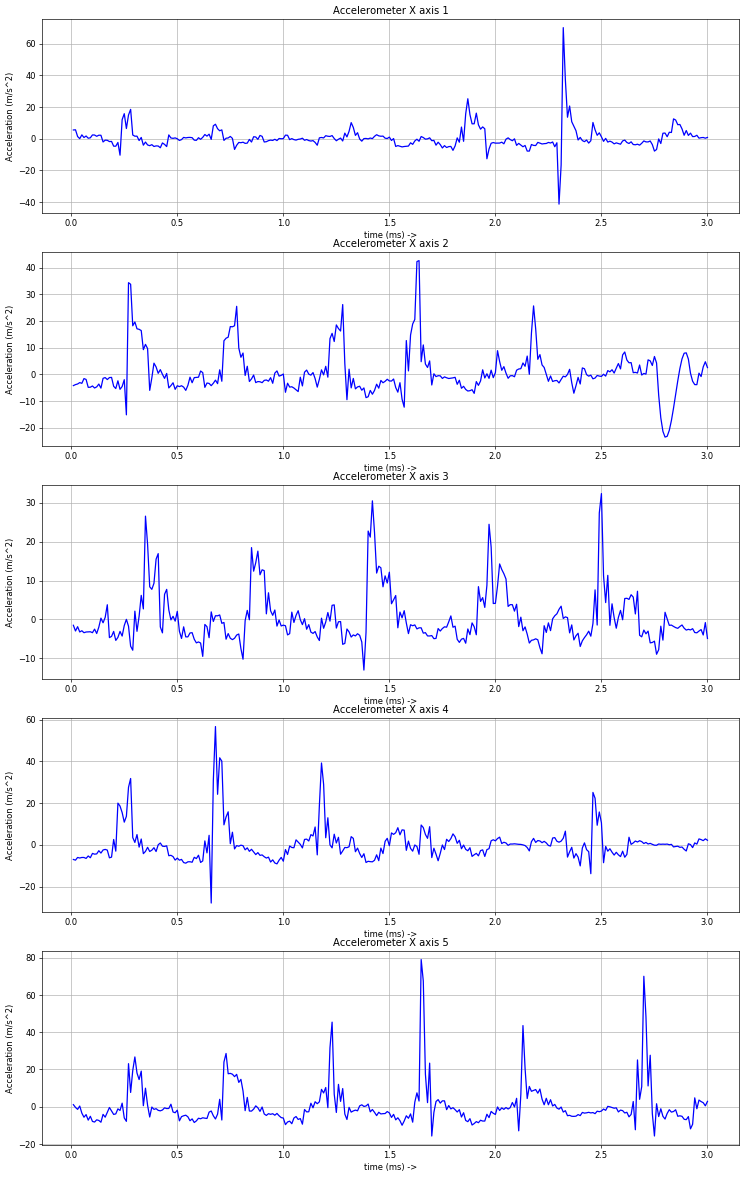

In [78]:
# up
Accelerometer_X_axis_data_1 = signals[8401, 0: 300]
Accelerometer_X_axis_data_2 = signals[7940, 0: 300]
Accelerometer_X_axis_data_3 = signals[7950, 0: 300]
Accelerometer_X_axis_data_4 = signals[8000, 0: 300]
Accelerometer_X_axis_data_5 = signals[8400, 0: 300]
time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data_1, 'b')
ax1.title.set_text('Accelerometer X axis 1')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(612)
ax1.plot(time, Accelerometer_X_axis_data_2, 'b')
ax1.title.set_text('Accelerometer X axis 2')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(613)
ax1.plot(time, Accelerometer_X_axis_data_3, 'b')
ax1.title.set_text('Accelerometer X axis 3')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(614)
ax1.plot(time, Accelerometer_X_axis_data_4, 'b')
ax1.title.set_text('Accelerometer X axis 4')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(615)
ax1.plot(time, Accelerometer_X_axis_data_5, 'b')
ax1.title.set_text('Accelerometer X axis 5')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

plt.show()

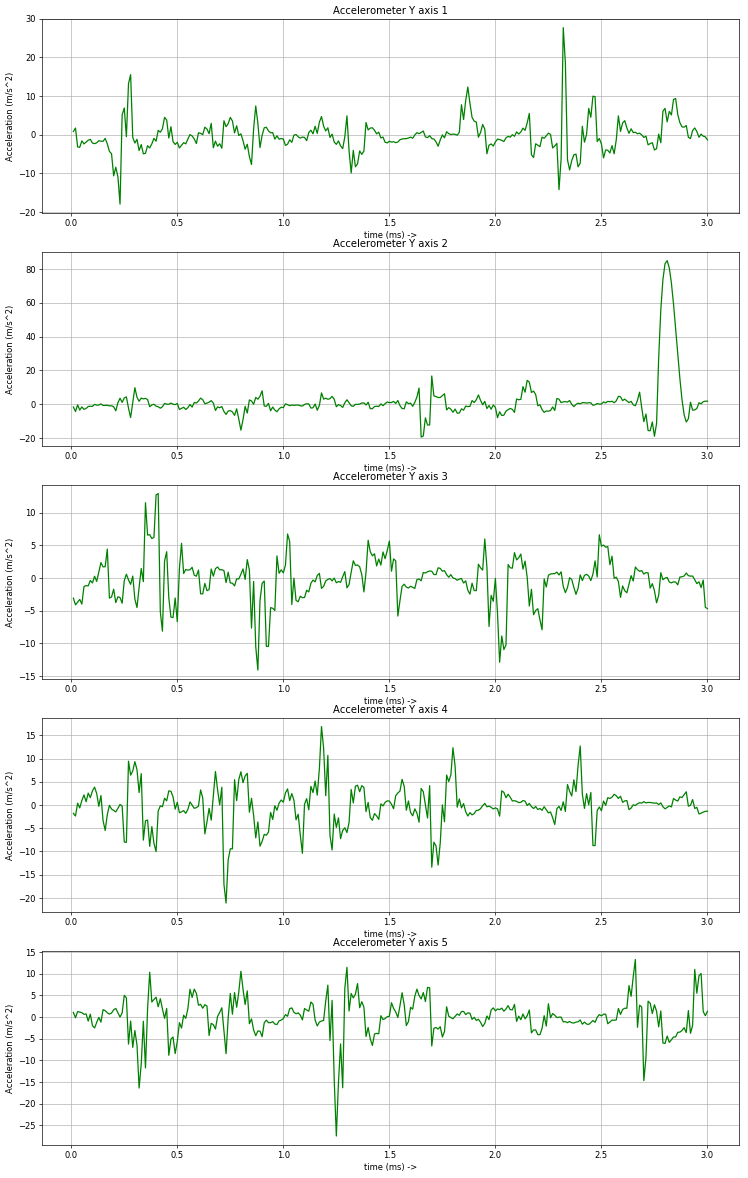

In [79]:
# up
Accelerometer_Y_axis_data_1 = signals[8401, 300: 600]
Accelerometer_Y_axis_data_2 = signals[7940, 300: 600]
Accelerometer_Y_axis_data_3 = signals[7950, 300: 600]
Accelerometer_Y_axis_data_4 = signals[8000, 300: 600]
Accelerometer_Y_axis_data_5 = signals[8400, 300: 600]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax2 = plt.subplot(611)
ax2.plot(time, Accelerometer_Y_axis_data_1, 'g')
ax2.title.set_text('Accelerometer Y axis 1')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(612)
ax2.plot(time, Accelerometer_Y_axis_data_2, 'g')
ax2.title.set_text('Accelerometer Y axis 2')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(613)
ax2.plot(time, Accelerometer_Y_axis_data_3, 'g')
ax2.title.set_text('Accelerometer Y axis 3')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(614)
ax2.plot(time, Accelerometer_Y_axis_data_4, 'g')
ax2.title.set_text('Accelerometer Y axis 4')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(615)
ax2.plot(time, Accelerometer_Y_axis_data_5, 'g')
ax2.title.set_text('Accelerometer Y axis 5')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

plt.show()

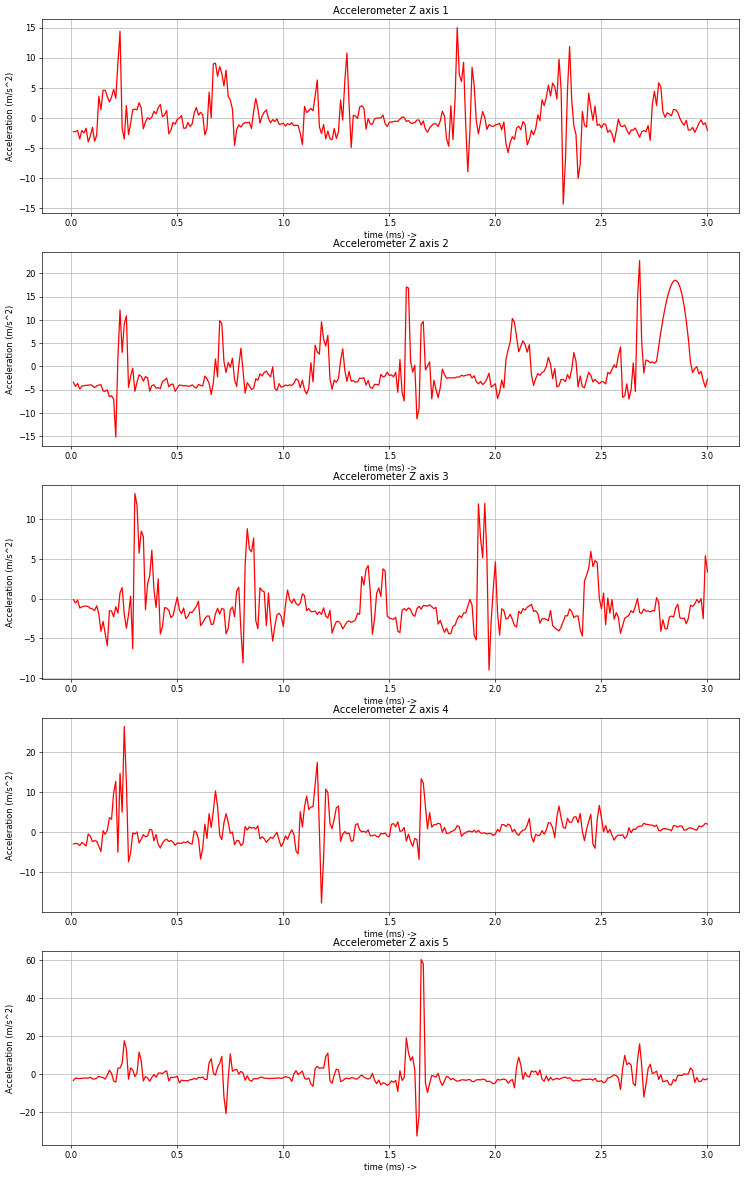

In [80]:
# up

Accelerometer_Z_axis_data_1 = signals[8401, 600: 900]
Accelerometer_Z_axis_data_2 = signals[7940, 600: 900]
Accelerometer_Z_axis_data_3 = signals[7950, 600: 900]
Accelerometer_Z_axis_data_4 = signals[8000, 600: 900]
Accelerometer_Z_axis_data_5 = signals[8400, 600: 900]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax3 = plt.subplot(612)
ax3.plot(time, Accelerometer_Z_axis_data_1, 'r')
ax3.title.set_text('Accelerometer Z axis 1')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(613)
ax3.plot(time, Accelerometer_Z_axis_data_2, 'r')
ax3.title.set_text('Accelerometer Z axis 2')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(614)
ax3.plot(time, Accelerometer_Z_axis_data_3, 'r')
ax3.title.set_text('Accelerometer Z axis 3')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(615)
ax3.plot(time, Accelerometer_Z_axis_data_4, 'r')
ax3.title.set_text('Accelerometer Z axis 4')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(616)
ax3.plot(time, Accelerometer_Z_axis_data_5, 'r')
ax3.title.set_text('Accelerometer Z axis 5')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

plt.show()

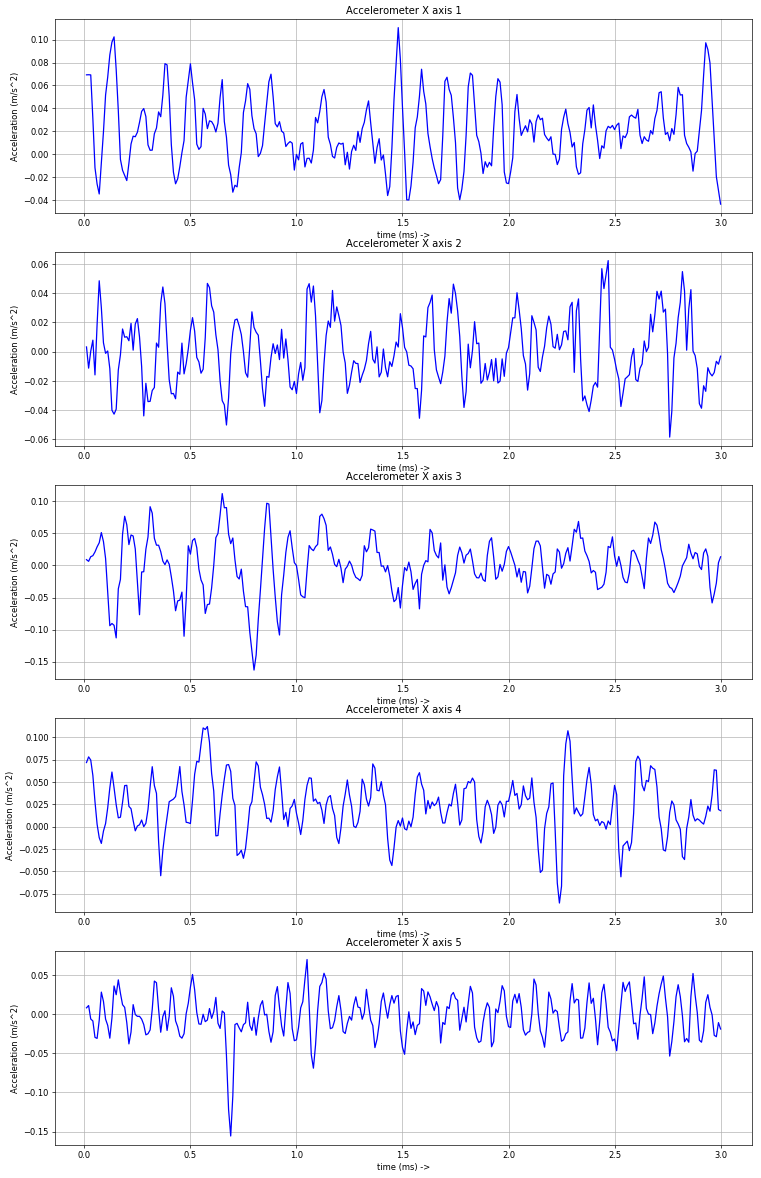

In [60]:
Accelerometer_X_axis_data_1 = signals[8, 0: 300]
Accelerometer_X_axis_data_2 = signals[300, 0: 300]
Accelerometer_X_axis_data_3 = signals[800, 0: 300]
Accelerometer_X_axis_data_4 = signals[1100, 0: 300]
Accelerometer_X_axis_data_5 = signals[1800, 0: 300]
time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data_1, 'b')
ax1.title.set_text('Accelerometer X axis 1')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(612)
ax1.plot(time, Accelerometer_X_axis_data_2, 'b')
ax1.title.set_text('Accelerometer X axis 2')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(613)
ax1.plot(time, Accelerometer_X_axis_data_3, 'b')
ax1.title.set_text('Accelerometer X axis 3')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(614)
ax1.plot(time, Accelerometer_X_axis_data_4, 'b')
ax1.title.set_text('Accelerometer X axis 4')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax1 = plt.subplot(615)
ax1.plot(time, Accelerometer_X_axis_data_5, 'b')
ax1.title.set_text('Accelerometer X axis 5')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

plt.show()

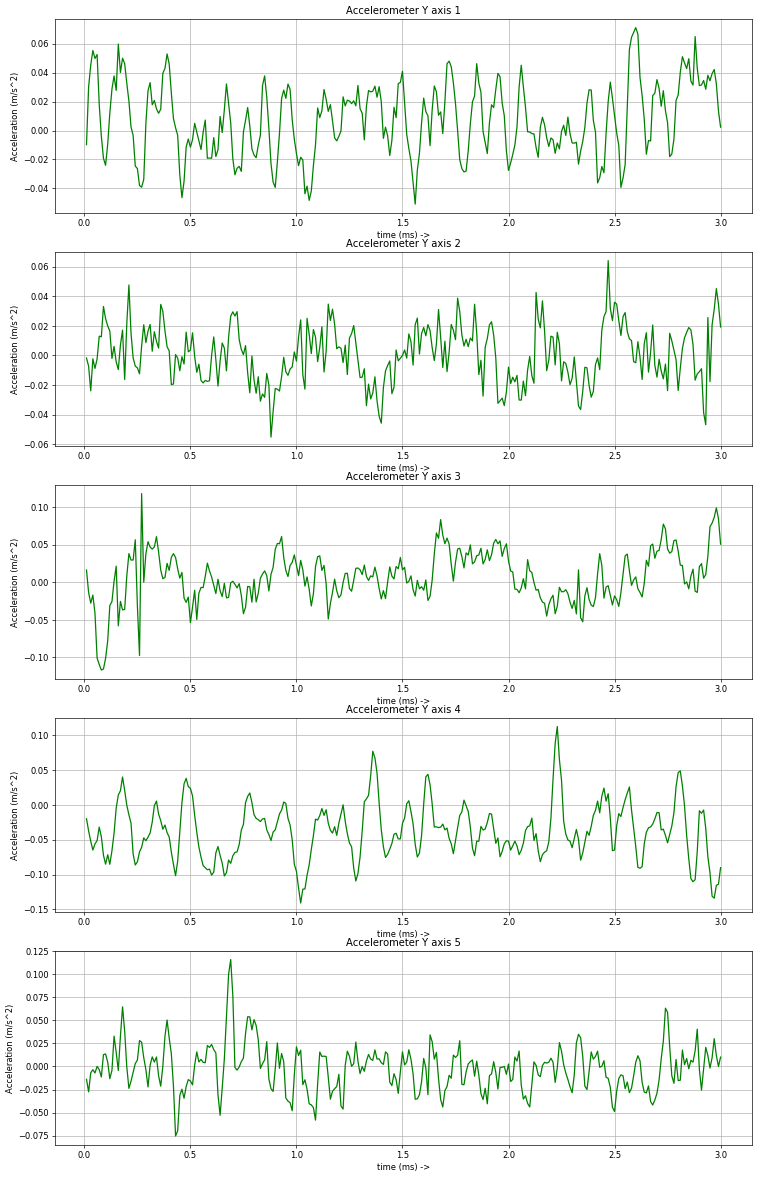

In [61]:
Accelerometer_Y_axis_data_1 = signals[8, 300: 600]
Accelerometer_Y_axis_data_2 = signals[300, 300: 600]
Accelerometer_Y_axis_data_3 = signals[800, 300: 600]
Accelerometer_Y_axis_data_4 = signals[1100, 300: 600]
Accelerometer_Y_axis_data_5 = signals[1800, 300: 600]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax2 = plt.subplot(611)
ax2.plot(time, Accelerometer_Y_axis_data_1, 'g')
ax2.title.set_text('Accelerometer Y axis 1')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(612)
ax2.plot(time, Accelerometer_Y_axis_data_2, 'g')
ax2.title.set_text('Accelerometer Y axis 2')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(613)
ax2.plot(time, Accelerometer_Y_axis_data_3, 'g')
ax2.title.set_text('Accelerometer Y axis 3')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(614)
ax2.plot(time, Accelerometer_Y_axis_data_4, 'g')
ax2.title.set_text('Accelerometer Y axis 4')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax2 = plt.subplot(615)
ax2.plot(time, Accelerometer_Y_axis_data_5, 'g')
ax2.title.set_text('Accelerometer Y axis 5')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

plt.show()

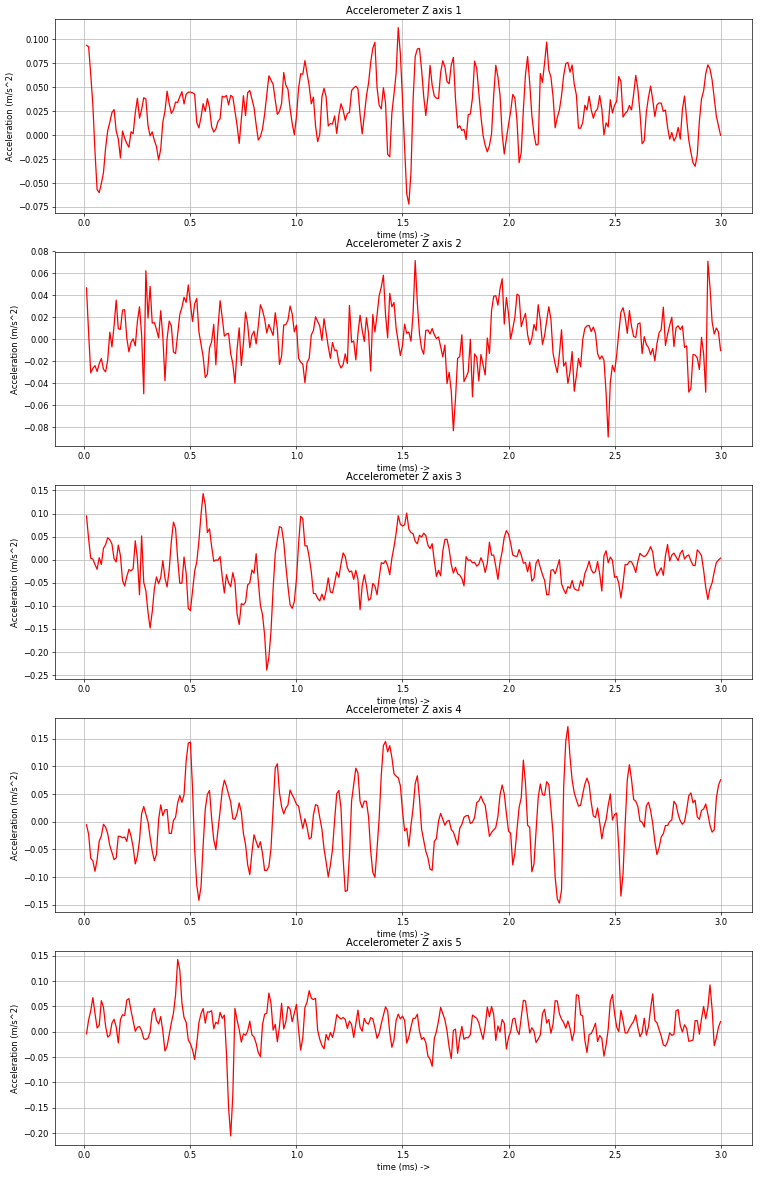

In [62]:
Accelerometer_Z_axis_data_1 = signals[8, 600: 900]
Accelerometer_Z_axis_data_2 = signals[300, 600: 900]
Accelerometer_Z_axis_data_3 = signals[800, 600: 900]
Accelerometer_Z_axis_data_4 = signals[1100, 600: 900]
Accelerometer_Z_axis_data_5 = signals[1800, 600: 900]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax3 = plt.subplot(612)
ax3.plot(time, Accelerometer_Z_axis_data_1, 'r')
ax3.title.set_text('Accelerometer Z axis 1')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(613)
ax3.plot(time, Accelerometer_Z_axis_data_2, 'r')
ax3.title.set_text('Accelerometer Z axis 2')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(614)
ax3.plot(time, Accelerometer_Z_axis_data_3, 'r')
ax3.title.set_text('Accelerometer Z axis 3')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(615)
ax3.plot(time, Accelerometer_Z_axis_data_4, 'r')
ax3.title.set_text('Accelerometer Z axis 4')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax3 = plt.subplot(616)
ax3.plot(time, Accelerometer_Z_axis_data_5, 'r')
ax3.title.set_text('Accelerometer Z axis 5')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

plt.show()

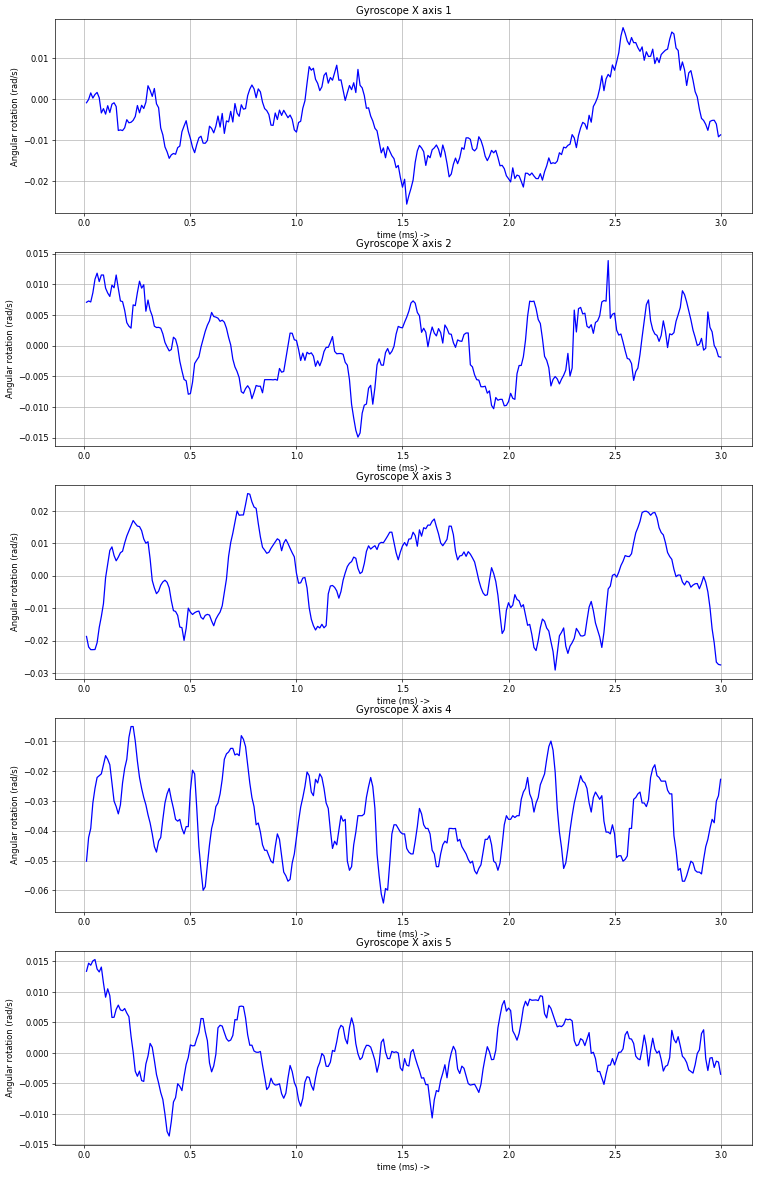

In [63]:
Gyroscope_X_axis_data_1 = signals[8, 900: 1200]
Gyroscope_X_axis_data_2 = signals[300, 900: 1200]
Gyroscope_X_axis_data_3 = signals[800, 900: 1200]
Gyroscope_X_axis_data_4 = signals[1100, 900: 1200]
Gyroscope_X_axis_data_5 = signals[1800, 900: 1200]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax4 = plt.subplot(611)
ax4.plot(time, Gyroscope_X_axis_data_1, 'b')
ax4.title.set_text('Gyroscope X axis 1')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(612)
ax4.plot(time, Gyroscope_X_axis_data_2, 'b')
ax4.title.set_text('Gyroscope X axis 2')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(613)
ax4.plot(time, Gyroscope_X_axis_data_3, 'b')
ax4.title.set_text('Gyroscope X axis 3')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(614)
ax4.plot(time, Gyroscope_X_axis_data_4, 'b')
ax4.title.set_text('Gyroscope X axis 4')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(615)
ax4.plot(time, Gyroscope_X_axis_data_5, 'b')
ax4.title.set_text('Gyroscope X axis 5')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

plt.show()

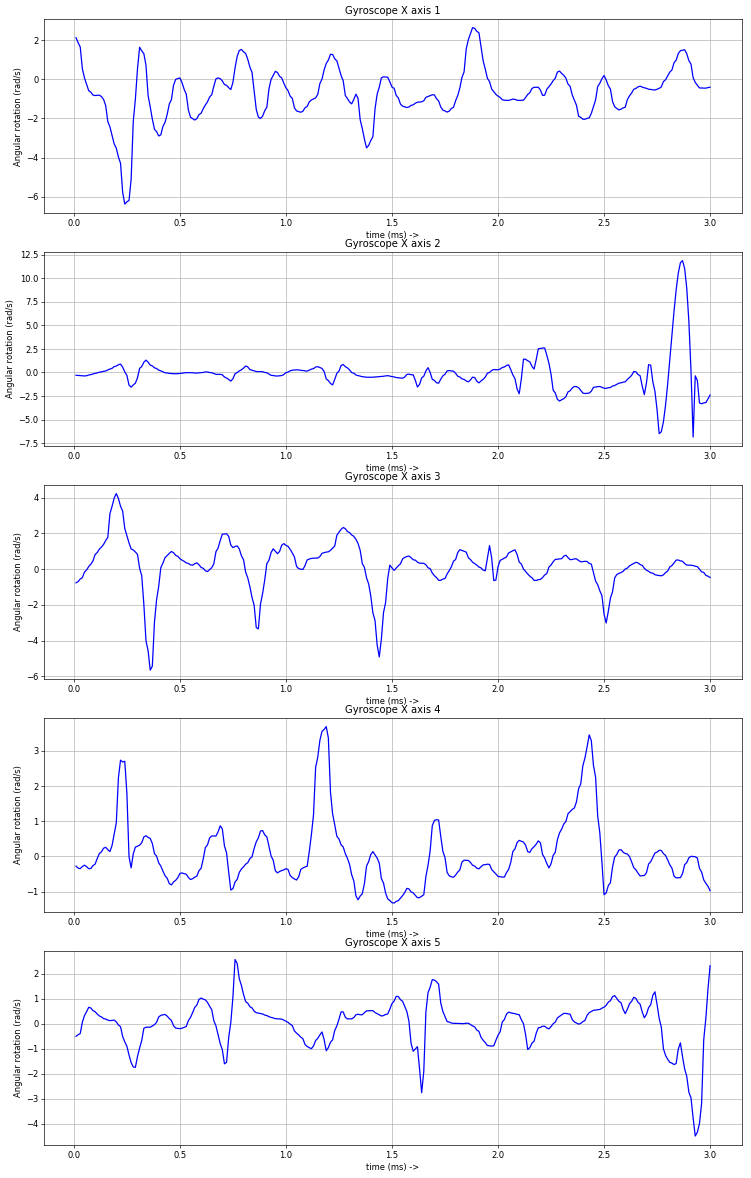

In [81]:
# Up
Gyroscope_X_axis_data_1 = signals[8401, 900: 1200]
Gyroscope_X_axis_data_2 = signals[7940, 900: 1200]
Gyroscope_X_axis_data_3 = signals[7950, 900: 1200]
Gyroscope_X_axis_data_4 = signals[8000, 900: 1200]
Gyroscope_X_axis_data_5 = signals[8400, 900: 1200]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax4 = plt.subplot(611)
ax4.plot(time, Gyroscope_X_axis_data_1, 'b')
ax4.title.set_text('Gyroscope X axis 1')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(612)
ax4.plot(time, Gyroscope_X_axis_data_2, 'b')
ax4.title.set_text('Gyroscope X axis 2')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(613)
ax4.plot(time, Gyroscope_X_axis_data_3, 'b')
ax4.title.set_text('Gyroscope X axis 3')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(614)
ax4.plot(time, Gyroscope_X_axis_data_4, 'b')
ax4.title.set_text('Gyroscope X axis 4')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax4 = plt.subplot(615)
ax4.plot(time, Gyroscope_X_axis_data_5, 'b')
ax4.title.set_text('Gyroscope X axis 5')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

plt.show()

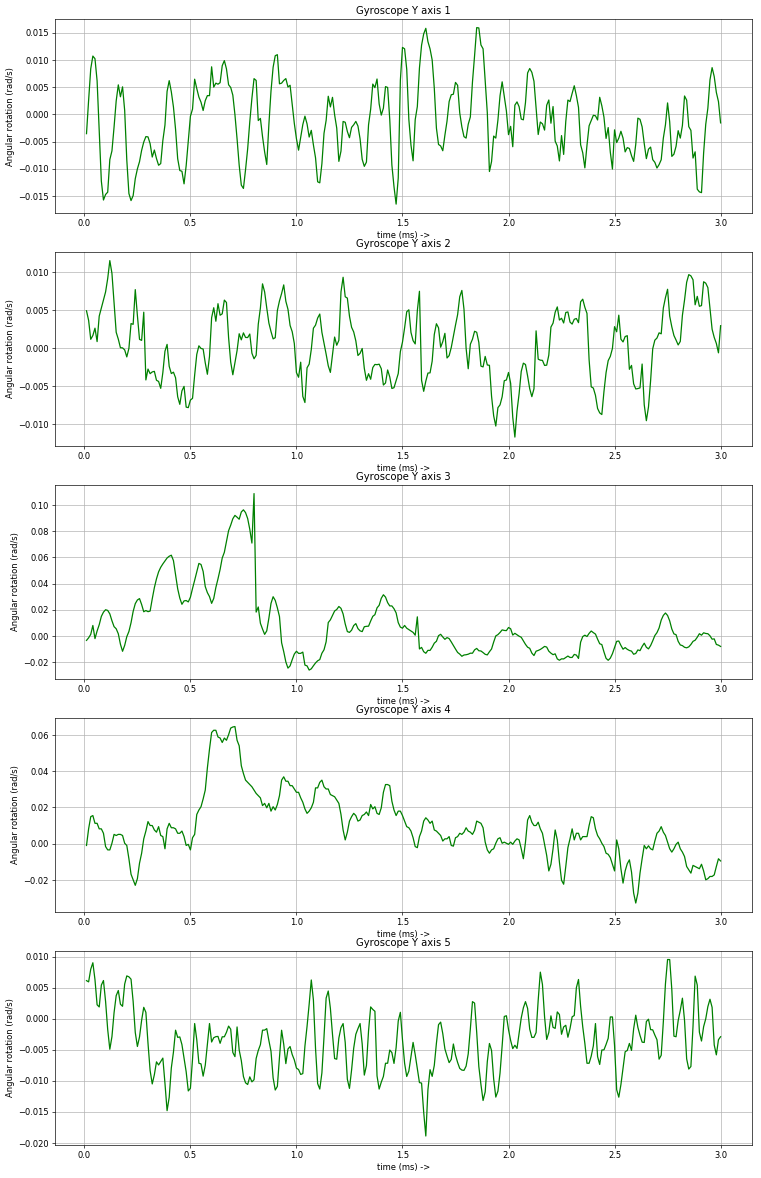

In [64]:
Gyroscope_Y_axis_data_1 = signals[8, 1200: 1500]
Gyroscope_Y_axis_data_2 = signals[300, 1200: 1500]
Gyroscope_Y_axis_data_3 = signals[800, 1200: 1500]
Gyroscope_Y_axis_data_4 = signals[1100, 1200: 1500]
Gyroscope_Y_axis_data_5 = signals[1800, 1200: 1500]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax5 = plt.subplot(611)
ax5.plot(time, Gyroscope_Y_axis_data_1, 'g')
ax5.title.set_text('Gyroscope Y axis 1')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(612)
ax5.plot(time, Gyroscope_Y_axis_data_2, 'g')
ax5.title.set_text('Gyroscope Y axis 2')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(613)
ax5.plot(time, Gyroscope_Y_axis_data_3, 'g')
ax5.title.set_text('Gyroscope Y axis 3')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(614)
ax5.plot(time, Gyroscope_Y_axis_data_4, 'g')
ax5.title.set_text('Gyroscope Y axis 4')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(615)
ax5.plot(time, Gyroscope_Y_axis_data_5, 'g')
ax5.title.set_text('Gyroscope Y axis 5')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

plt.show()


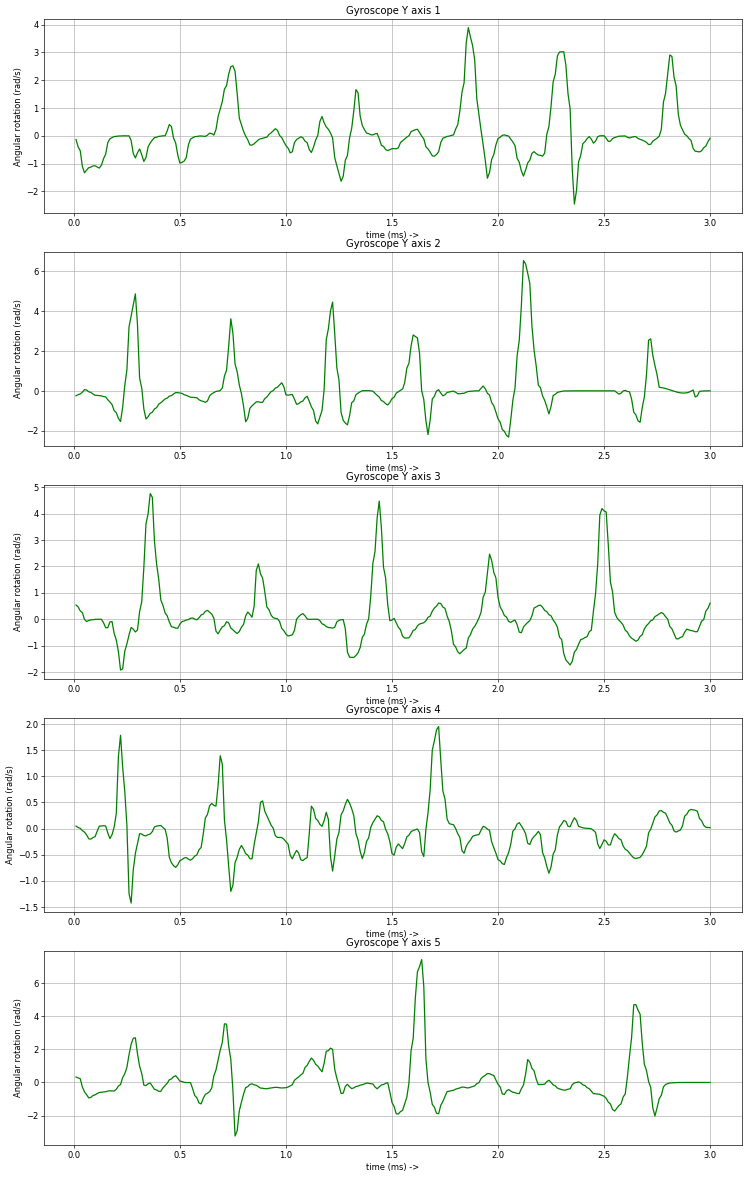

In [82]:
# Up
Gyroscope_Y_axis_data_1 = signals[8401, 1200: 1500]
Gyroscope_Y_axis_data_2 = signals[7940, 1200: 1500]
Gyroscope_Y_axis_data_3 = signals[7950, 1200: 1500]
Gyroscope_Y_axis_data_4 = signals[8000, 1200: 1500]
Gyroscope_Y_axis_data_5 = signals[8400, 1200: 1500]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax5 = plt.subplot(611)
ax5.plot(time, Gyroscope_Y_axis_data_1, 'g')
ax5.title.set_text('Gyroscope Y axis 1')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(612)
ax5.plot(time, Gyroscope_Y_axis_data_2, 'g')
ax5.title.set_text('Gyroscope Y axis 2')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(613)
ax5.plot(time, Gyroscope_Y_axis_data_3, 'g')
ax5.title.set_text('Gyroscope Y axis 3')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(614)
ax5.plot(time, Gyroscope_Y_axis_data_4, 'g')
ax5.title.set_text('Gyroscope Y axis 4')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax5 = plt.subplot(615)
ax5.plot(time, Gyroscope_Y_axis_data_5, 'g')
ax5.title.set_text('Gyroscope Y axis 5')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

plt.show()


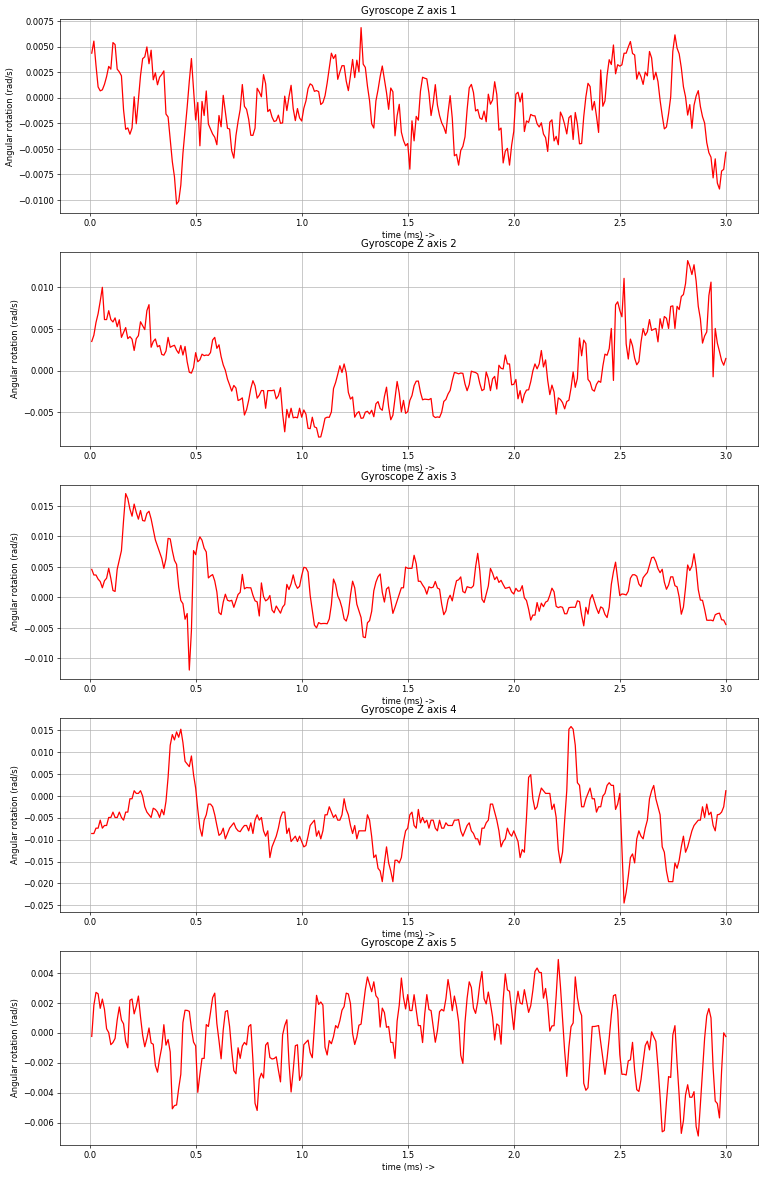

In [66]:
Gyroscope_Z_axis_data_1 = signals[8, 1500: 1800]
Gyroscope_Z_axis_data_2 = signals[300, 1500: 1800]
Gyroscope_Z_axis_data_3 = signals[800, 1500: 1800]
Gyroscope_Z_axis_data_4 = signals[1100, 1500: 1800]
Gyroscope_Z_axis_data_5 = signals[1800, 1500: 1800]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax6 = plt.subplot(611)
ax6.plot(time, Gyroscope_Z_axis_data_1, 'r')
ax6.title.set_text('Gyroscope Z axis 1')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(612)
ax6.plot(time, Gyroscope_Z_axis_data_2, 'r')
ax6.title.set_text('Gyroscope Z axis 2')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(613)
ax6.plot(time, Gyroscope_Z_axis_data_3, 'r')
ax6.title.set_text('Gyroscope Z axis 3')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(614)
ax6.plot(time, Gyroscope_Z_axis_data_4, 'r')
ax6.title.set_text('Gyroscope Z axis 4')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(615)
ax6.plot(time, Gyroscope_Z_axis_data_5, 'r')
ax6.title.set_text('Gyroscope Z axis 5')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

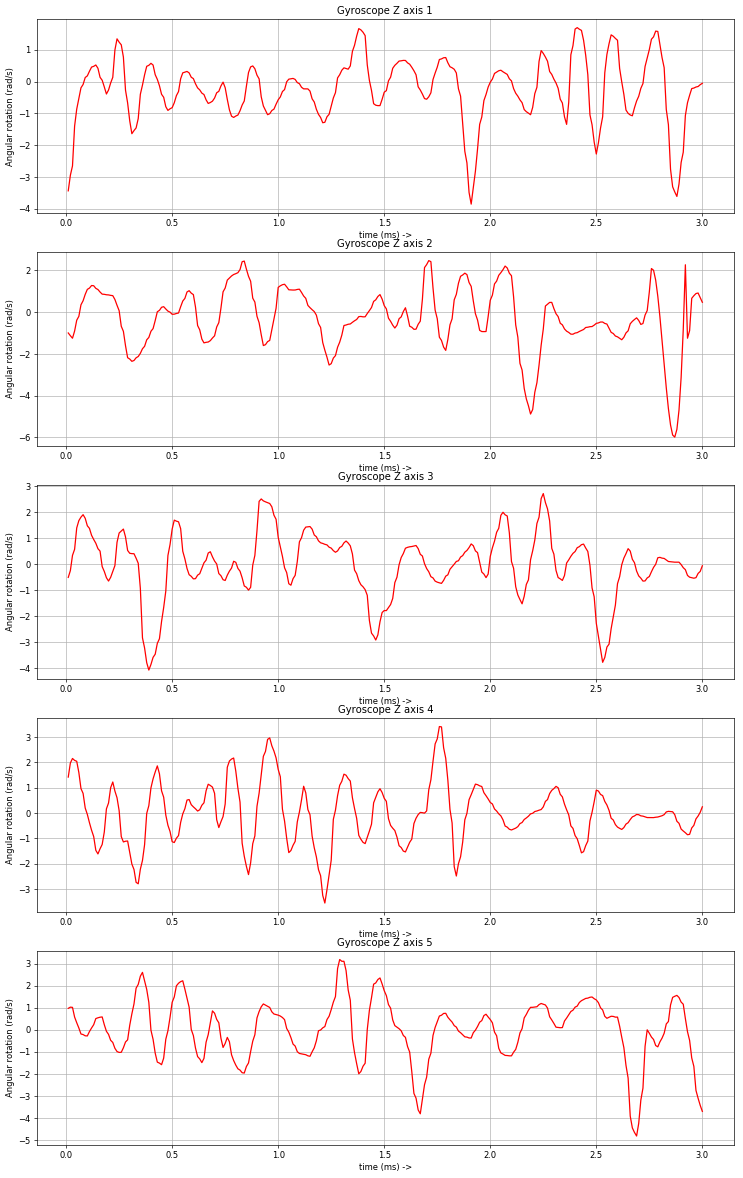

In [83]:
# Up
Gyroscope_Z_axis_data_1 = signals[8401, 1500: 1800]
Gyroscope_Z_axis_data_2 = signals[7940, 1500: 1800]
Gyroscope_Z_axis_data_3 = signals[7950, 1500: 1800]
Gyroscope_Z_axis_data_4 = signals[8000, 1500: 1800]
Gyroscope_Z_axis_data_5 = signals[8400, 1500: 1800]

time = np.linspace(.01, 3, 300)

figure(figsize=(15, 30), dpi=60)

ax6 = plt.subplot(611)
ax6.plot(time, Gyroscope_Z_axis_data_1, 'r')
ax6.title.set_text('Gyroscope Z axis 1')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(612)
ax6.plot(time, Gyroscope_Z_axis_data_2, 'r')
ax6.title.set_text('Gyroscope Z axis 2')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(613)
ax6.plot(time, Gyroscope_Z_axis_data_3, 'r')
ax6.title.set_text('Gyroscope Z axis 3')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(614)
ax6.plot(time, Gyroscope_Z_axis_data_4, 'r')
ax6.title.set_text('Gyroscope Z axis 4')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

ax6 = plt.subplot(615)
ax6.plot(time, Gyroscope_Z_axis_data_5, 'r')
ax6.title.set_text('Gyroscope Z axis 5')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()